In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing data


In [ ]:
df = pd.read_csv('/content/data.csv')
df.head().T.round(2)

,0,1,2,3,4
Player Name,Henrik Stenson,Ryan Armour,Chez Reavie,Ryan Moore,Brian Stuard
Rounds,60,109,93,78,103
Fairway Percentage,75.19,73.58,72.24,71.94,71.44
Year,2018,2018,2018,2018,2018
Avg Distance,291.5,283.5,286.5,289.2,278.9
gir,73.51,68.22,68.67,68.8,67.12
Average Putts,29.93,29.31,29.12,29.17,29.11
Average Scrambling,60.67,60.13,62.27,64.16,59.23
Average Score,69.62,70.76,70.43,70.02,71.04
Points,868,1006,1020,795,421


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   float64
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

In [ ]:
df.shape

(2312, 18)

Data cleaning

In [ ]:
# Replace NaN with 0 in Top 10 
df['Top 10'].fillna(0, inplace=True)
df['Top 10'] = df['Top 10'].astype(int)

# Replace NaN with 0 in # of wins
df['Wins'].fillna(0, inplace=True)
df['Wins'] = df['Wins'].astype(int)

# Drop NaN values 
df.dropna(axis = 0, inplace=True)

In [ ]:
df['Rounds'] = df['Rounds'].astype(int)

# Change Points to int 
#df['Points'] = df['Points'].apply(lambda x: x.replace(',',''))
#df['Points'] = df['Points'].astype(int)

# Remove the $ and commas in money 
#df['Money'] = df['Money'].apply(lambda x: x.replace('$',''))
#df['Money'] = df['Money'].apply(lambda x: x.replace(',',''))
#df['Money'] = df['Money'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1674 non-null   object 
 1   Rounds              1674 non-null   int64  
 2   Fairway Percentage  1674 non-null   float64
 3   Year                1674 non-null   int64  
 4   Avg Distance        1674 non-null   float64
 5   gir                 1674 non-null   float64
 6   Average Putts       1674 non-null   float64
 7   Average Scrambling  1674 non-null   float64
 8   Average Score       1674 non-null   float64
 9   Points              1674 non-null   float64
 10  Wins                1674 non-null   int64  
 11  Top 10              1674 non-null   int64  
 12  Average SG Putts    1674 non-null   float64
 13  Average SG Total    1674 non-null   float64
 14  SG:OTT              1674 non-null   float64
 15  SG:APR              1674 non-null   float64
 16  SG:ARG

In [ ]:
df.head().T.to_excel("sample data after cleaning.xlsx")

In [ ]:
df.describe().T.round(2).to_excel("desc_stats.xlsx")

In [ ]:
df.isna().sum().to_excel("desc_stats1.xlsx")

Exploratory data analysis

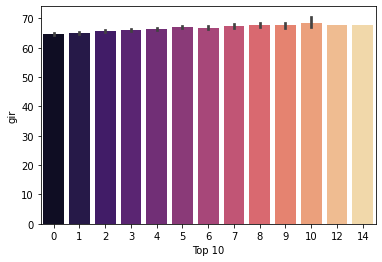

In [ ]:
plot = sns.barplot(x= 'Top 10',y='gir',data=df,palette = "magma")
plot.get_figure().savefig('graph_1.png', bbox_inches='tight')

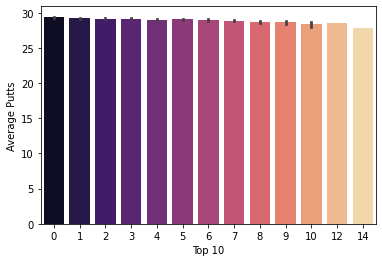

In [ ]:
plot = sns.barplot(x= 'Top 10',y='Average Putts',data=df,palette = "magma")
plot.get_figure().savefig('graph_2.png', bbox_inches='tight')

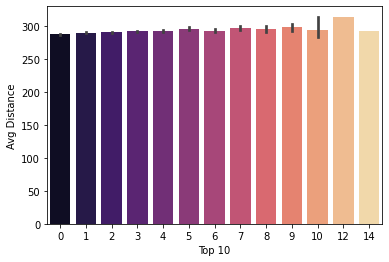

In [ ]:
plot = sns.barplot(x= 'Top 10',y='Avg Distance',data=df,palette = "magma")
plot.get_figure().savefig('graph_2.png', bbox_inches='tight')

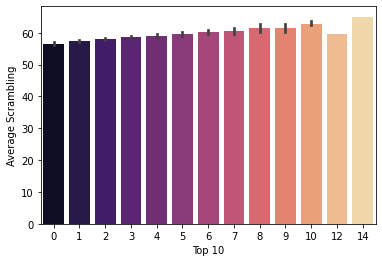

In [ ]:
plot = sns.barplot(x= 'Top 10',y='Average Scrambling',data=df,palette = "magma")
plot.get_figure().savefig('graph_2.png', bbox_inches='tight')

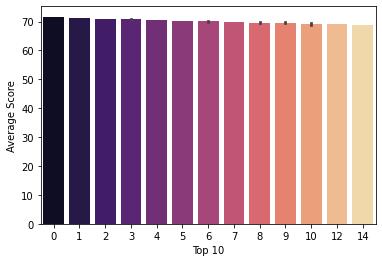

In [ ]:
plot = sns.barplot(x= 'Top 10',y='Average Score',data=df,palette = "magma")
plot.get_figure().savefig('graph_2.png', bbox_inches='tight')

Index(['Rounds', 'Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Points', 'Wins',
       'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG',
       'Money'],
      dtype='object')


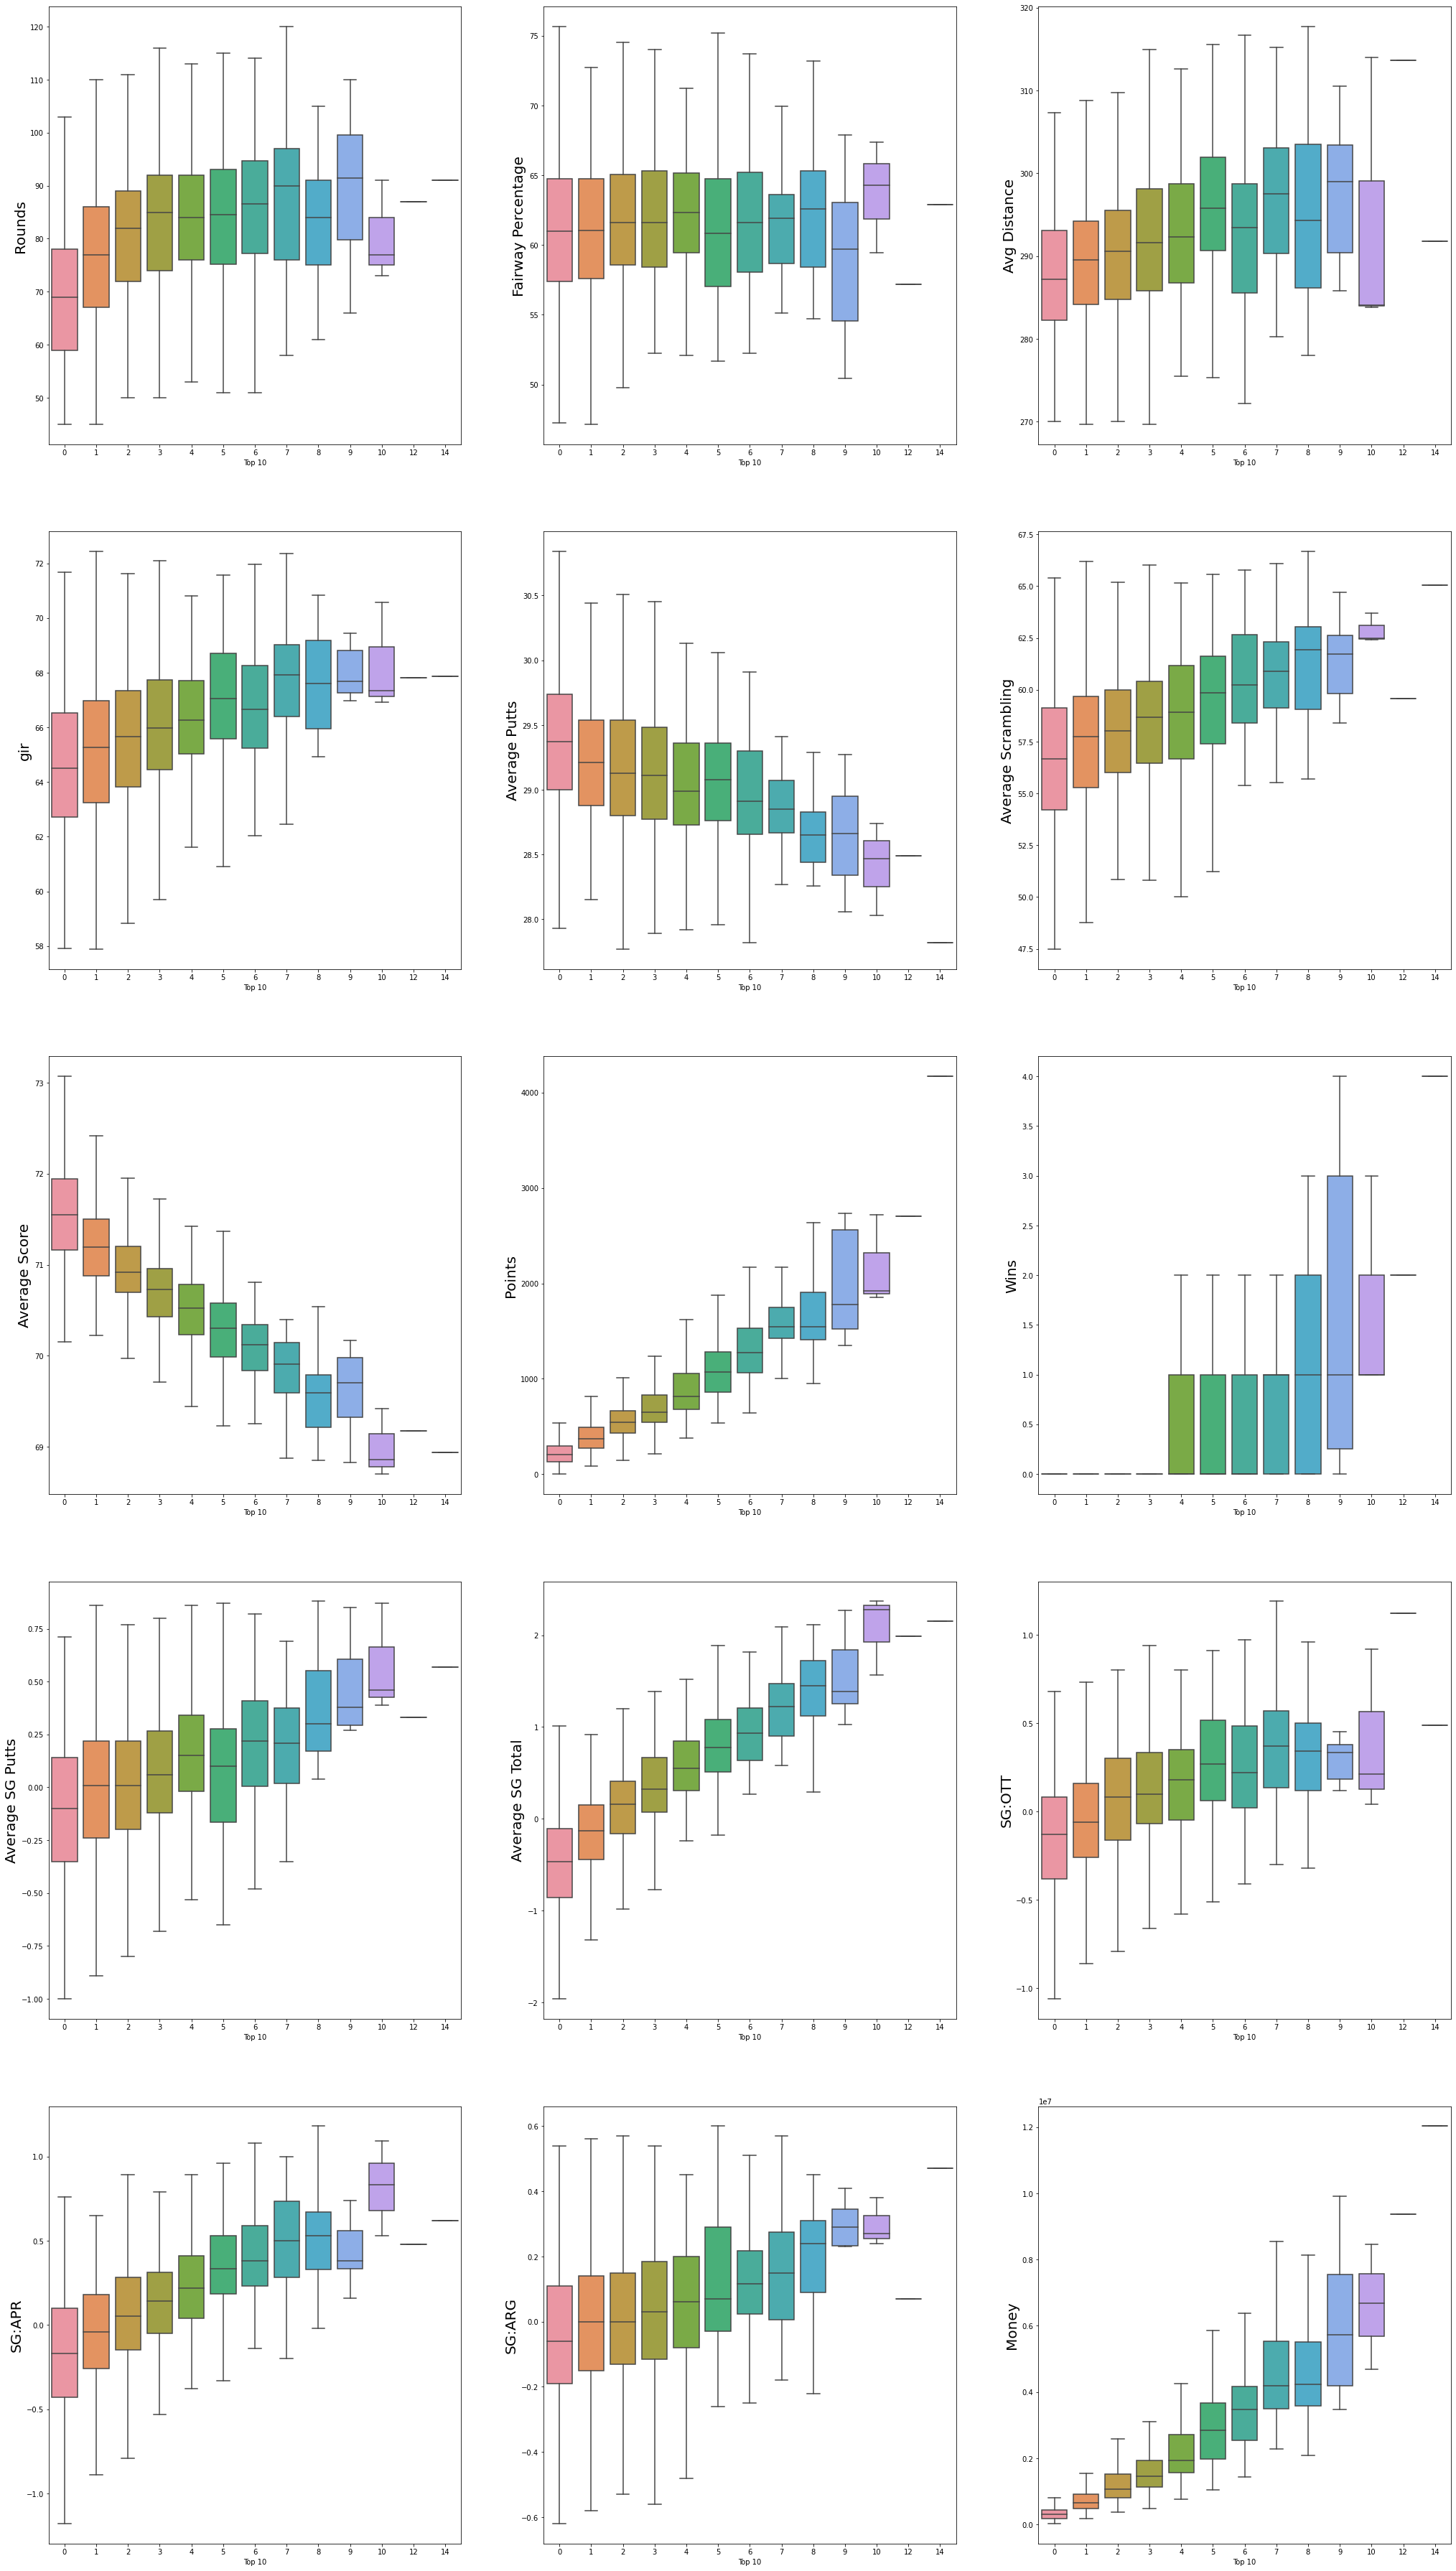

In [ ]:
#boxplots to find outliers

f, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(35,65))
distribution = df.loc[:,(df.columns!='Player Name')].columns
distribution = distribution[distribution != 'Year']
distribution = distribution[distribution != 'Top 10']

print(distribution)
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.boxplot(x = 'Top 10', y = column, data=df, ax=ax[rows][cols], showfliers=False)
    p.set_ylabel(column,fontsize=20)
    p.set_xlabel('Top 10',fontsize=10)
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [ ]:
df['Top 10'].value_counts()

1     381
2     321
0     321
3     251
4     149
5     110
6      62
7      39
8      25
9      10
10      3
14      1
12      1
Name: Top 10, dtype: int64

In [ ]:
df[['Top 10']] = df['Top 10'].apply(lambda x : 0 if x <= 6 else 1)
df['Top 10'].value_counts()

0    1595
1      79
Name: Top 10, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


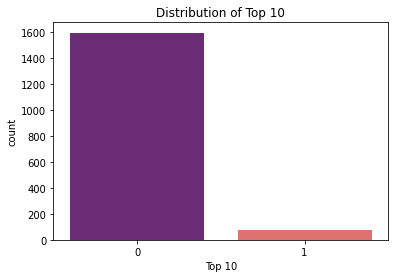

In [ ]:
plot = sns.countplot(df['Top 10'],palette = "magma").set_title('Distribution of Top 10')
plot.get_figure().savefig('data.png', bbox_inches='tight')

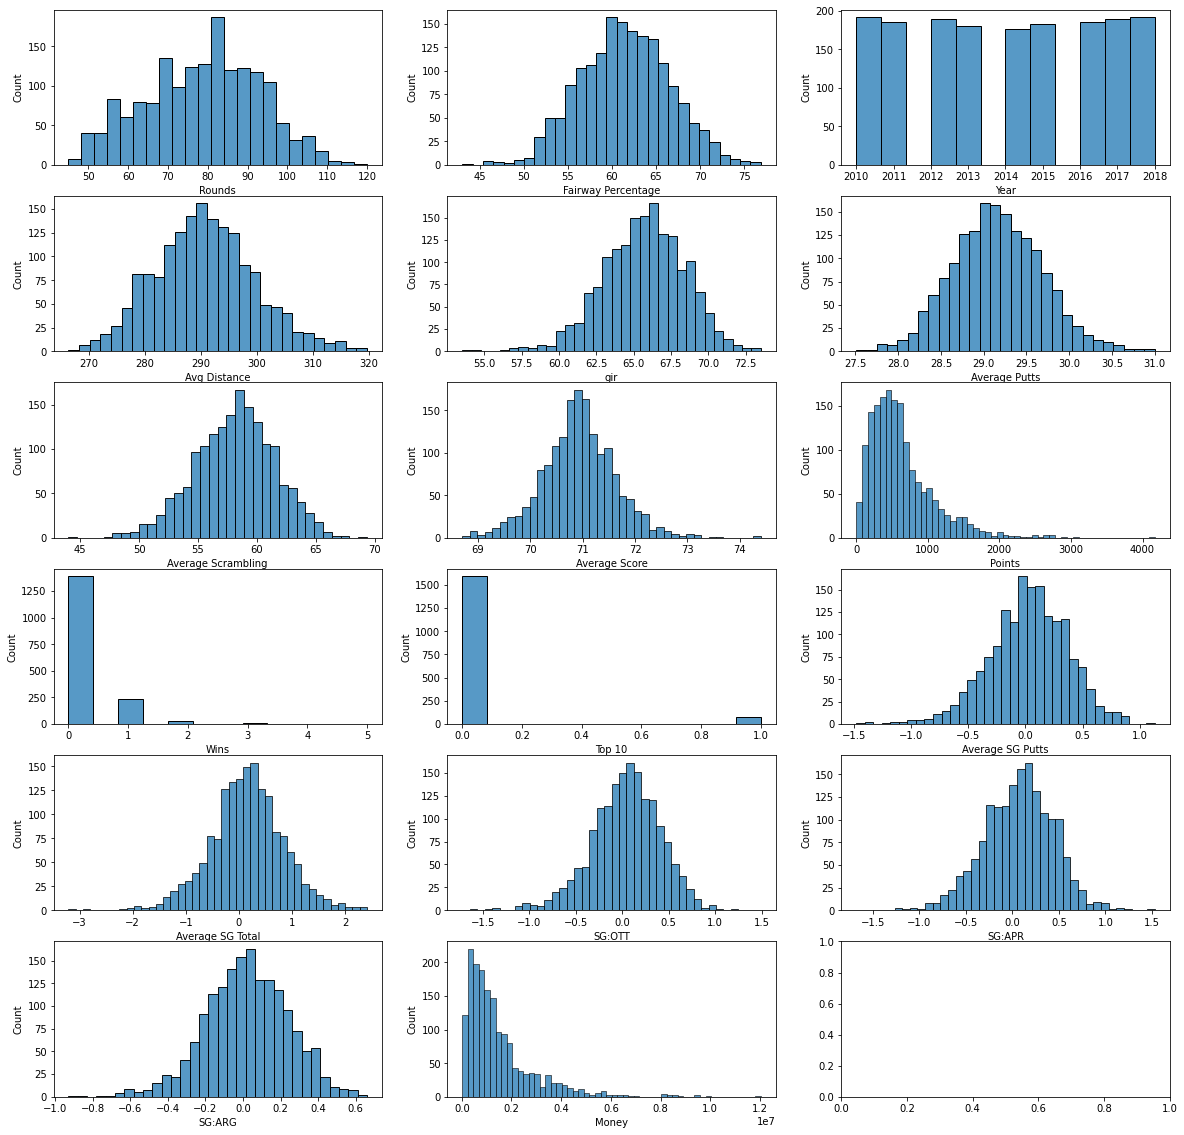

In [ ]:
# Looking at the distribution of data
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(20,20))
distribution = df.loc[:,df.columns!='Player Name'].columns
rows = 0
cols = 0
for i, column in enumerate(distribution):
    p = sns.histplot(df[column], ax=ax[rows][cols])
    cols += 1
    if cols == 3:
        cols = 0
        rows += 1

In [ ]:
# Looking at the number of players with <=6 or >6 top 10 for each year 
Top10 = df.groupby('Year')['Top 10'].value_counts()
Top10 = Top10.unstack()
Top10.to_excel("desc_stats2.xlsx")

In [ ]:
# Looking at the percentage of players with greater than 6 top 10 in that year 
players = Top10.apply(lambda x: np.sum(x), axis=1)
percent_morethan5_Top10 = Top10[1]/players
percent_morethan5_Top10 = percent_morethan5_Top10 *100
percent_morethan5_Top10.to_excel("percent of players with greater than 6 top 10.xlsx")
percent_morethan5_Top10.to_excel

<bound method NDFrame.to_excel of Year
2010    1.041667
2011    3.225806
2012    3.157895
2013    3.888889
2014    9.659091
2015    7.103825
2016    5.405405
2017    4.736842
2018    4.687500
dtype: float64>

Text(0.5, 1.0, 'Percentage of Players with more than 6 top 10')

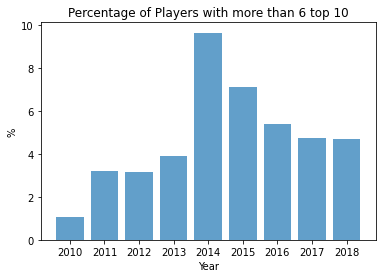

In [ ]:
# Plotting percentage of players with more than 5 top 10 each year 
fig, ax = plt.subplots()
bar_width = 0.8
opacity = 0.7 
index = np.arange(2010, 2019)

plt.bar(index, percent_morethan5_Top10, bar_width, alpha = opacity)
plt.xticks(index)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of Players with more than 6 top 10')

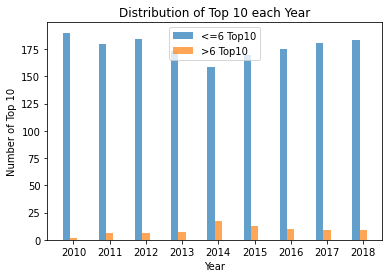

In [ ]:
# Plotting the number of Top 10 on a bar chart 
fig, ax = plt.subplots()
index = np.arange(2010, 2019)
bar_width = 0.2
opacity = 0.7 

def plot_bar(index, Top10, labels):
    plt.bar(index, Top10, bar_width, alpha=opacity, label=labels)

# Plotting the bars
rects = plot_bar(index, Top10[0], labels = '<=6 Top10')
rects1 = plot_bar(index + bar_width, Top10[1], labels = '>6 Top10')
#rects2 = plot_bar(index + bar_width*2, win[2], labels = '2 Wins')
#rects3 = plot_bar(index + bar_width*3, win[3], labels = '3 Wins')
#rects4 = plot_bar(index + bar_width*4, win[4], labels = '4 Wins')
#rects5 = plot_bar(index + bar_width*5, win[5], labels = '5 Wins')

plt.xticks(index + bar_width, index)
plt.xlabel('Year')
plt.ylabel('Number of Top 10')
plt.title('Distribution of Top 10 each Year')
plt.legend()


In [ ]:
# Percentage of people <=6 top 10 each year
top10 = df.groupby('Year')['Top 10'].value_counts()
top10 = top10.unstack()
top10.fillna(0, inplace=True)
players = top10.apply(lambda x: np.sum(x), axis=1)

no_top10 = top10[0]/players * 100
print(no_top10)

Year
2010    98.958333
2011    96.774194
2012    96.842105
2013    96.111111
2014    90.340909
2015    92.896175
2016    94.594595
2017    95.263158
2018    95.312500
dtype: float64


Exploring the longest hitters

In [ ]:
# Who are some of the longest hitters 
distance = df[['Year','Player Name','Avg Distance']].copy()
distance.sort_values(by='Avg Distance', inplace=True, ascending=False)
print(distance.head())

      Year     Player Name  Avg Distance
162   2018    Rory McIlroy         319.7
1481  2011     J.B. Holmes         318.4
174   2018   Trey Mullinax         318.3
732   2015  Dustin Johnson         317.7
350   2017    Rory McIlroy         316.7


Exploring the Earnings of player

In [ ]:
# Who made the most money
money_ranking = df[['Year','Player Name','Money']].copy()
money_ranking.sort_values(by='Money', inplace=True, ascending=False)
print(money_ranking.head())

     Year     Player Name       Money
647  2015   Jordan Spieth  12030465.0
361  2017   Justin Thomas   9921560.0
303  2017   Jordan Spieth   9433033.0
729  2015       Jason Day   9403330.0
520  2016  Dustin Johnson   9365185.0


In [ ]:
# Who made the most money each year
money_rank = money_ranking.groupby('Year')['Money'].max()
money_rank = pd.DataFrame(money_rank)
print(money_rank.iloc[0,0])

indexs = np.arange(2010, 2019)
names = []
for i in range(money_rank.shape[0]):
    temp = df.loc[df['Money'] == money_rank.iloc[i,0],'Player Name']
    names.append(str(temp.values[0]))

money_rank['Player Name'] = names
print(money_rank)

4910477.0
           Money     Player Name
Year                            
2010   4910477.0     Matt Kuchar
2011   6683214.0     Luke Donald
2012   8047952.0    Rory McIlroy
2013   8553439.0     Tiger Woods
2014   8280096.0    Rory McIlroy
2015  12030465.0   Jordan Spieth
2016   9365185.0  Dustin Johnson
2017   9921560.0   Justin Thomas
2018   8694821.0   Justin Thomas


Golf statistics over time

Comparing the average and champions

In [ ]:
# Defining the players that had 6 Top 10 or more in each year 
champion = df.loc[df['Top 10'] == 1, :]
champion.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
20,Brian Harman,94,67.14,2018,291.9,67.59,29.29,56.95,70.54,1056.0,0,1,0.27,0.29,0.14,-0.02,-0.10,2733463.0
32,Justin Rose,70,66.02,2018,303.5,69.95,28.67,63.03,68.99,1991.0,2,1,0.42,1.95,0.55,0.53,0.45,8130678.0
89,Webb Simpson,95,62.34,2018,293.7,67.93,28.47,66.10,69.29,1710.0,1,1,0.69,1.43,-0.12,0.49,0.37,5376417.0
91,Bryson DeChambeau,93,62.23,2018,305.7,69.65,29.18,59.84,69.65,1617.0,1,1,0.35,1.56,0.59,0.56,0.07,8094489.0
120,Chesson Hadley,103,60.07,2018,300.0,67.68,28.99,56.60,70.31,1122.0,0,1,0.21,0.86,0.15,0.61,-0.10,2768863.0


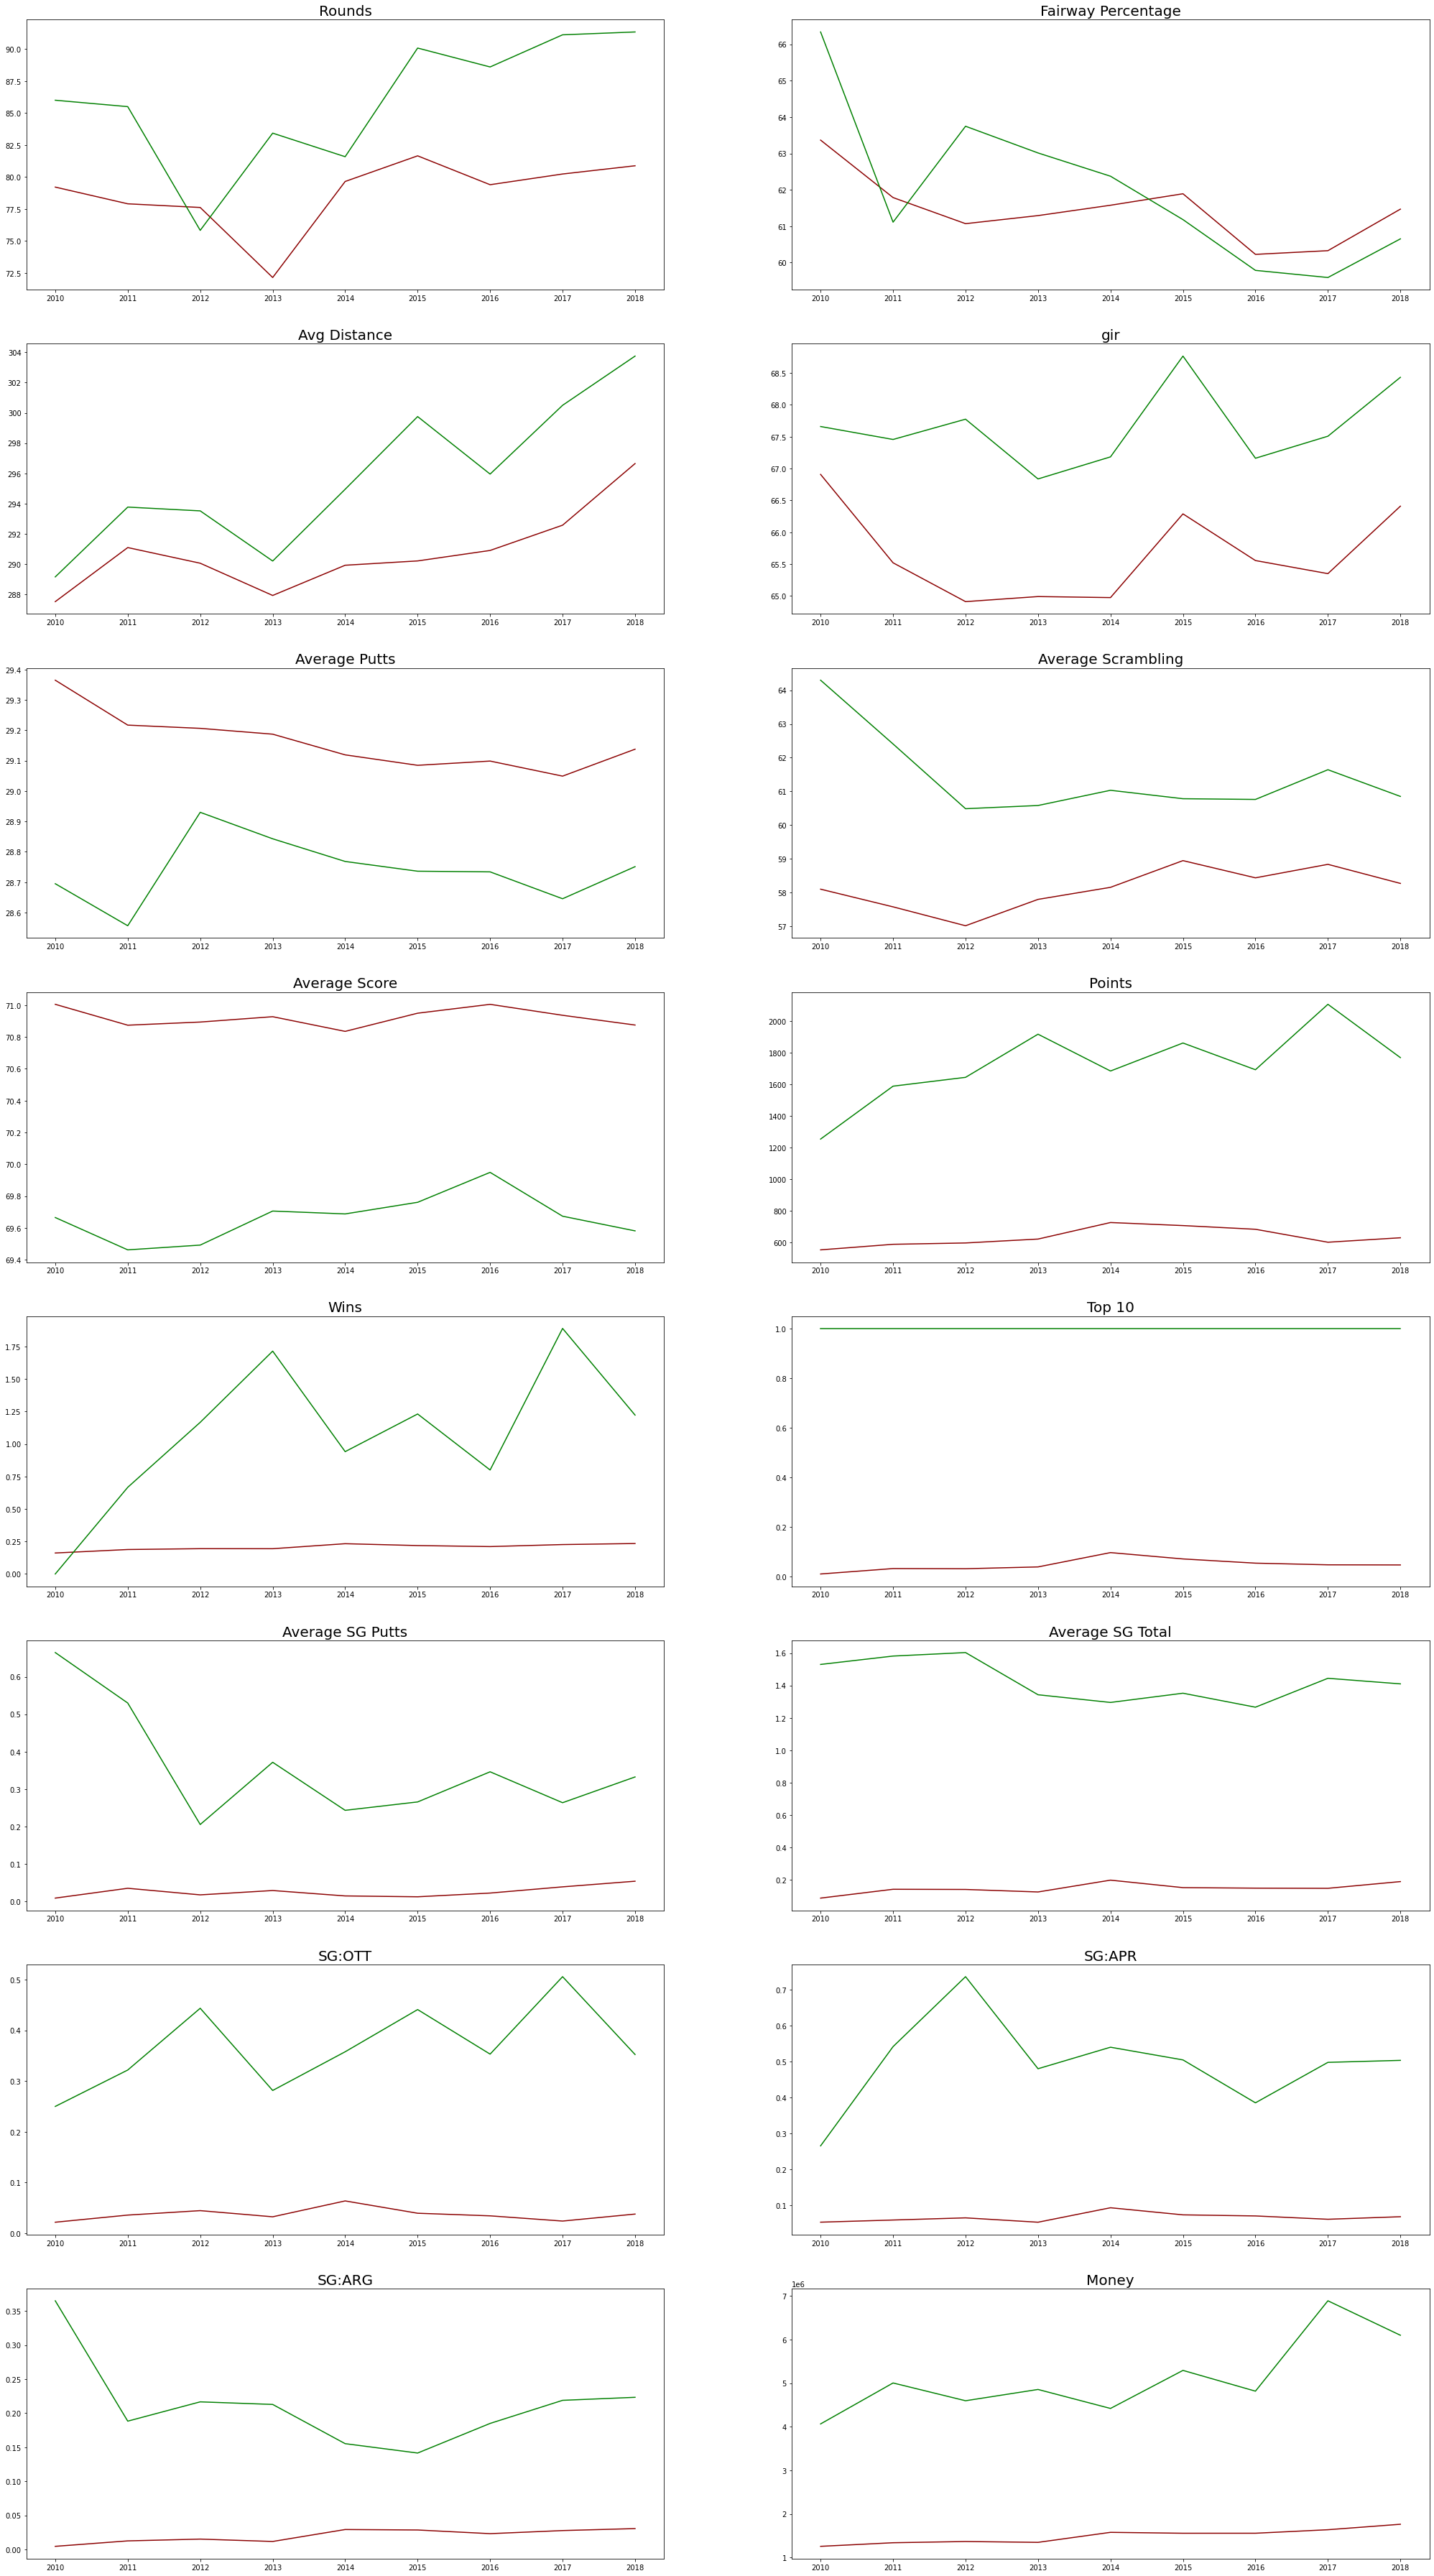

In [ ]:

f, ax = plt.subplots(nrows = 8, ncols = 2, figsize=(35,65))
distribution = df.loc[:,df.columns!='Player Name'].columns
distribution = distribution[distribution != 'Year']

rows = 0
cols = 0
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(distribution):
    avg = df.groupby('Year')[column].mean()
    best = champion.groupby('Year')[column].mean()
    ax[rows,cols].plot(avg, 'darkred',)
    ax[rows,cols].plot(best, 'green',)
    ax[rows,cols].set_title(column, fontsize = 20)
    
    cols += 1
    if cols == 2:
        cols = 0
        rows += 1

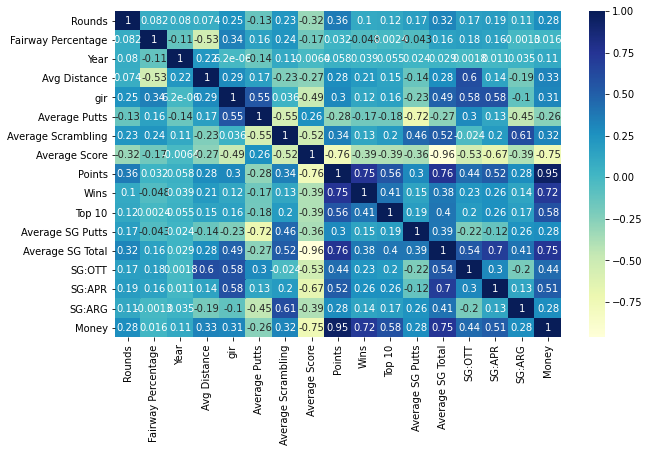

In [ ]:
#Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df_corr = df.corr()['Top 10']
df_corr.abs().sort_values(ascending = True)[1:]
pd.DataFrame(df_corr).abs().sort_values('Top 10',ascending = False)

,Top 10
Top 10,1.000000
Money,0.581556
Points,0.560281
Wins,0.407319
Average SG Total,0.396365
Average Score,0.393548
SG:APR,0.258632
SG:OTT,0.201581
Average Scrambling,0.196535
Average SG Putts,0.185977


In [ ]:
df_d = df[['Money','Points','Fairway Percentage','Year','Player Name','SG:ARG','Rounds','Wins','Average SG Total','Average SG Putts','SG:APR','SG:OTT'	]]
df_new = df.drop(df_d,axis=1)

In [ ]:
X = df_new.drop('Top 10',axis=1)
y = df_new['Top 10']

In [ ]:
df_new_corr = df_new.corr()['Top 10']
df_new_corr.abs().sort_values(ascending = True)[1:]
pd.DataFrame(df_new_corr).abs().sort_values('Top 10',ascending = False).to_excel("correlation of chosen attr.xlsx")
pd.DataFrame(df_new_corr).abs().sort_values('Top 10',ascending = False)

In [ ]:
# VIF dataframe 
X = pd.DataFrame(X)

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data = vif_data.sort_values('VIF',ascending = True).reset_index().drop('index',axis=1)
vif_data.to_excel("VIF of chosen attr.xlsx")
vif_data

##goodness of fit bataata h, contribution of the variable in defining

,feature,VIF
0,Average Scrambling,410.813087
1,Avg Distance,1070.738325
2,gir,1988.690158
3,Average Score,8892.973427
4,Average Putts,12443.221643


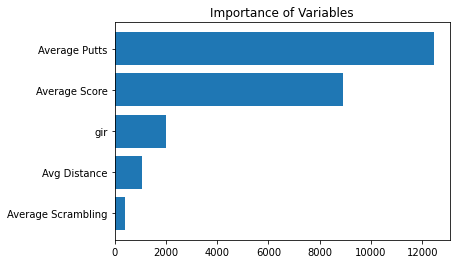

In [ ]:
plt.barh(vif_data['feature'],vif_data['VIF'])
plt.title('Importance of Variables')
plt.savefig('data', bbox_inches='tight')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier,Lasso, LassoCV, lars_path
from sklearn.linear_model import LassoLarsIC as LIC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

Classification models

LarsoLarsIC

In [ ]:
model_LassoLarsIC = LIC(criterion='aic')
model_LassoLarsIC.fit(scaler.transform(X_train), y_train) 

LassoLarsIC(copy_X=True, criterion='aic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=False)

In [ ]:
pred_IC = model_LassoLarsIC.predict(scaler.transform((X_test))) 

In [ ]:
metrics.mean_squared_error(y_true=y_test, y_pred=pred_IC)

0.029319650785859137

In [ ]:
model_LassoLarsIC.score(scaler.transform(X_train), y_train)

0.18511106638752173

OLS

In [ ]:
full_model = sm.OLS(y_train,scaler.transform(X_train)).fit()

In [ ]:
pred_OLS = full_model.predict(scaler.transform((X_test)))

In [ ]:
metrics.mean_squared_error(y_true=y_test, y_pred=pred_OLS)

0.03086178108169152

In [ ]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Top 10   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              53.22
Date:                Fri, 21 May 2021   Prob (F-statistic):                    3.58e-50
Time:                        01:30:01   Log-Likelihood:                          198.06
No. Observations:                1255   AIC:                                     -386.1
Df Residuals:                    1250   BIC:                                     -360.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0100      0.007      1.468      0.142      -0.003       0.023
x2             0.0292      0.012      2.507      0.012       0.006       0.052
x3            -0.0498      0.012     -4.214      0.000      -0.073      -0.027
x4            -0.0170      0.009     -1.910      0.056      -0.034       0.000
x5            -0.0700      0.010     -6.678      0.000      -0.091      -0.049
==============================================================================
Omnibus:                      790.223   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6288.454
Skew:                           2.965   Prob(JB):                         0.00
Kurtosis:                      12.225   Cond. No.                         4.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

LassoCV

In [ ]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
LassoCV(cv=5, normalize=True)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
model_lassoCV.coef_

array([ 0.00122107,  0.00950069, -0.08824953, -0.0043686 , -0.09071764])

In [ ]:
X.columns[np.abs(model_lassoCV.coef_) > 0]

Index(['Avg Distance', 'gir', 'Average Putts', 'Average Scrambling',
       'Average Score'],
      dtype='object')

In [ ]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(scaler.transform(X_train), y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
pred_CV = model_lassoCV.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_CV)

0.029311656987219672

In [ ]:
model_lassoCV.score(scaler.transform(X_train), y_train)

0.1851084671751746

Ridge

In [ ]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(scaler.transform(X_train), y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred_reg = reg.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_reg)

0.029317764244898892

In [ ]:
reg.score(scaler.transform(X_train), y_train)

0.18511100342809184

Logistic regression

In [ ]:
model_log = LogisticRegression(solver = 'lbfgs',random_state=0)
model_log.fit(scaler.transform(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_log = model_log.predict(scaler.transform((X_test)))
metrics.mean_squared_error(y_true=y_test, y_pred=pred_log)

0.028639618138424822

In [ ]:
X_test.head()

,Avg Distance,gir,Average Putts,Average Scrambling,Average Score
982,281.1,62.77,29.08,55.92,71.12
1340,285.0,66.12,29.68,54.50,71.00
883,299.2,67.08,28.97,59.53,70.46
259,287.2,62.71,28.90,56.82,71.64
141,313.1,68.21,29.33,56.64,70.38


In [ ]:
X.columns

Index(['Avg Distance', 'gir', 'Average Putts', 'Average Scrambling',
       'Average Score'],
      dtype='object')

In [ ]:
model_log.coef_

array([[ 0.00904975,  1.25189086, -1.48484432, -0.27642216, -1.86061881]])

In [ ]:
model_log.intercept_

array([-5.3881438])

In [ ]:
model_log.score(scaler.transform(X_train), y_train)

0.9577689243027888

In [ ]:
scores = cross_val_score(model_log, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross-Validation Accuracy Scores [0.96031746 0.95238095 0.94444444 0.96031746 0.94444444 0.96
 0.968      0.96       0.944      0.96      ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.944, 0.9553904761904761, 0.968)

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=pred_log)
print('confusion matrix:\n', cm)

confusion matrix:
 [[404   1]
 [ 11   3]]


In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')

tn: 404, fp: 1, fn: 11, tp: 3


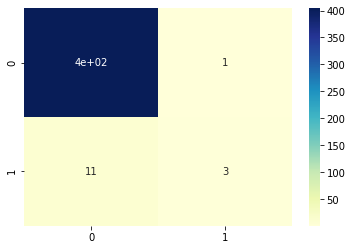

In [ ]:
plot = sns.heatmap(pd.DataFrame(cm), annot = True, cmap="YlGnBu")
plot.get_figure().savefig('cm.png', bbox_inches='tight')

In [ ]:
print('classification report:\n', classification_report(y_test, pred_log))

#f1-score is harmonic mean of precision and recall

classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       405
           1       0.75      0.21      0.33        14

    accuracy                           0.97       419
   macro avg       0.86      0.61      0.66       419
weighted avg       0.97      0.97      0.96       419



In [ ]:
predict_prob = model_log.predict_proba(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predict_prob[:, 1])
print('AUC: {:.2f}'.format(auc(fpr, tpr)))
##howmuch variance is covered in the curve

AUC: 0.84


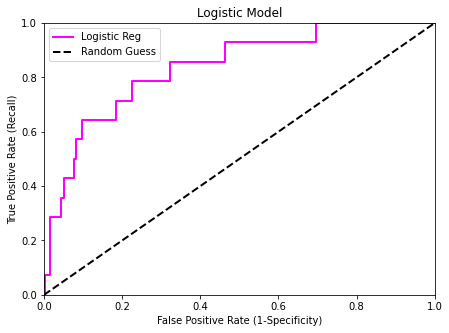

In [ ]:
plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr, color = 'magenta', lw = 2, label = 'Logistic Reg')
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--', label = 'Random Guess')
plt.title('Logistic Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Recall)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show();

##to decide on howmuch % of false positive(type 2 error)


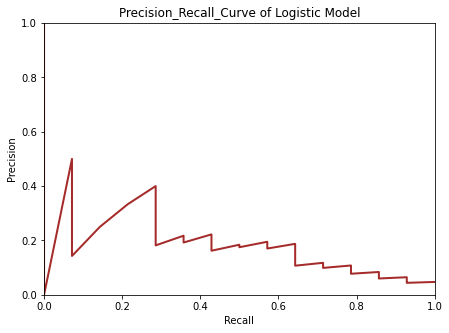

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predict_prob[:,1] )

plt.figure(figsize = (7, 5))
plt.plot(recall, precision, color='brown', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve of Logistic Model')
plt.show();

# recall: predicting something which is true as true

In [94]:
import pandas as pd
from matplotlib import pyplot as plt

Winner = pd.read_excel('/content/top 10.xlsx')
Winner
#sales_data = df.groupby('Order Date')[['Sales', 'Profit']].sum()

#print(sales_data.sort_values(by = ['Profit']))



,Player Name,Avg Distance,gir,avg putt,Average Scrambling,Average Score,Top 10,pred top 10
0,Brian Gay,287.0,60.4,31.896,57.29,71.315,1,-128.258065
1,Adam Long,289.2,62.1,31.626,61.20,70.414,2,-125.153245
2,Brandon Hagy,311.4,63.6,32.130,56.64,71.337,1,-124.681541
3,J.T. Poston,300.6,61.9,31.176,60.99,70.357,1,-124.674506
4,Peter Malnati,290.6,63.4,30.744,60.45,71.836,3,-124.667307
...,...,...,...,...,...,...,...,...
70,Corey Conners,295.0,71.0,31.392,55.08,70.494,7,-112.173597
71,Bryson DeChambeau,306.5,72.9,31.482,57.45,71.116,3,-111.845138
72,Jon Rahm,307.2,72.3,31.608,63.45,69.365,9,-111.190287
73,Emiliano Grillo,299.5,72.4,31.590,51.95,70.986,3,-110.805896


In [103]:
# Replace NaN with 0 in Top 10 
Winner['Top 10'].fillna(0, inplace=True)
Winner['Top 10'] = Winner['Top 10'].astype(int)



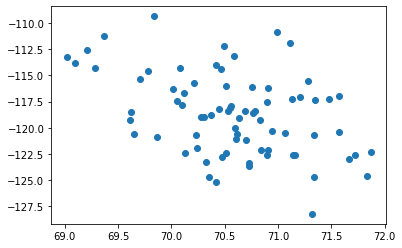

In [104]:
plt.scatter(Winner['Average Score'], Winner['pred top 10'])

plt.show()

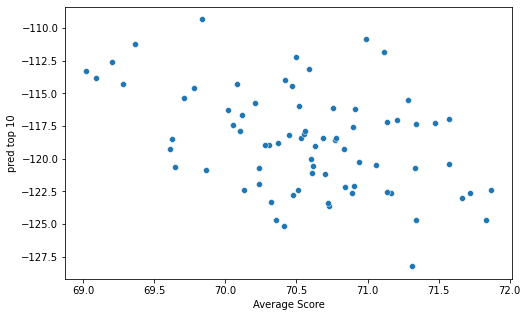

In [108]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x=Winner['Average Score'],y=Winner['pred top 10'])

plt.show()

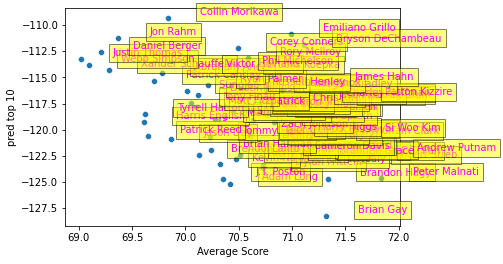

In [118]:
sns.scatterplot(data=df,x=Winner['Average Score'],y=Winner['pred top 10'])
for i in range(Winner.shape[0]):
 plt.text(x=Winner['Average Score'][i]+0.3,y=Winner['pred top 10'][i]+0.3,s=Winner['Player Name'][i], 
          fontdict=dict(color='magenta',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))